In [ ]:
!pip install -q japanize-matplotlib

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

from scipy import stats

# グラフのスタイルの指定
plt.style.use('bmh')
%matplotlib inline
%precision 3

'%.3f'

In [ ]:
df = pd.read_csv('/content/exercise.csv')
df.head(5)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#CV別の各変数の平均
df_cv_mean = df.groupby("conversion", as_index=False) .mean()
df_cv_mean

,conversion,recency,history,used_discount,used_bogo,is_referral
0,0,5.872505,235.163403,0.549647,0.538988,0.517580
1,1,5.131467,282.323739,0.559080,0.612093,0.413136


## 各変数に対するCV率とその他平均

In [ ]:
#全体のCV率
df['conversion'].mean()

0.147

In [ ]:
# recencyとCV率
df_recency_mean = df.groupby("recency", as_index=False) .mean()
df_recency_mean

,recency,history,used_discount,used_bogo,is_referral,conversion
0,1,359.844955,0.572498,0.578195,0.554178,0.193029
1,2,310.990777,0.574764,0.555924,0.532440,0.177790
2,3,274.462007,0.557419,0.560976,0.518631,0.166328
3,4,251.310701,0.545007,0.559779,0.508568,0.148907
4,5,233.153233,0.549446,0.554545,0.490022,0.142350
5,6,218.387238,0.558523,0.538111,0.479045,0.140717
6,7,207.557580,0.553948,0.531633,0.480873,0.133889
7,8,194.924066,0.551645,0.529900,0.483548,0.127897
8,9,185.874574,0.534389,0.536563,0.478031,0.113957
9,10,172.104997,0.530205,0.536153,0.475215,0.112624


In [ ]:
# used_discountとCV率
df_used_discount_mean = df.groupby("used_discount", as_index=False) .mean()
df_used_discount_mean

,used_discount,recency,history,used_bogo,is_referral,conversion
0,0,5.885501,210.109902,1.000000,0.490673,0.144150
1,1,5.664521,268.138832,0.182839,0.511683,0.148925


In [ ]:
# used_bogoとCV率
df_used_bogo_mean = df.groupby("used_bogo", as_index=False) .mean()
df_used_bogo_mean

,used_bogo,recency,history,used_discount,is_referral,conversion
0,0,5.866889,209.626353,1.000000,0.490457,0.126449
1,1,5.679239,268.673462,0.183276,0.511909,0.163436


In [ ]:
#zip_codeとCV率
df_zip_code_mean = df.groupby("zip_code", as_index=False) .mean()
df_zip_code_mean

,zip_code,recency,history,used_discount,used_bogo,is_referral,conversion
0,Rural,5.730210,242.853935,0.552023,0.547527,0.496601,0.188121
1,Surburban,5.803100,240.488905,0.549034,0.550111,0.503371,0.139943
2,Urban,5.732084,243.589924,0.552901,0.550095,0.503098,0.139044


In [ ]:
#is_referralとCV率
df_is_referral_mean = df.groupby("is_referral", as_index=False) .mean()
df_is_referral_mean

,is_referral,recency,history,used_discount,used_bogo,conversion
0,0,5.947325,184.633287,0.540589,0.539051,0.173060
1,1,5.581788,299.023269,0.561380,0.560291,0.120738


In [ ]:
#channelとCV率
df_channel_mean = df.groupby("channel", as_index=False) .mean()
df_channel_mean

,channel,recency,history,used_discount,used_bogo,is_referral,conversion
0,Multichannel,4.768488,520.970370,0.632698,0.624195,0.595723,0.171734
1,Phone,5.897541,202.807184,0.539203,0.538953,0.493309,0.127155
2,Web,5.904632,204.375017,0.540313,0.539923,0.485417,0.159407


In [ ]:
#offerとCV率
df_offer_mean = df.groupby("offer", as_index=False) .mean()
df_offer_mean

,offer,recency,history,used_discount,used_bogo,is_referral,conversion
0,Buy One Get One,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400
1,Discount,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757
2,No Offer,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167


## 各変数に対するCV率の可視化

In [ ]:
# recencyとCV率
cross_recency = pd.crosstab(df["recency"], df["conversion"], normalize="index")
cross_recency

conversion,0,1
recency,,
1,0.806971,0.193029
2,0.822210,0.177790
3,0.833672,0.166328
4,0.851093,0.148907
5,0.857650,0.142350
6,0.859283,0.140717
7,0.866111,0.133889
8,0.872103,0.127897
9,0.886043,0.113957


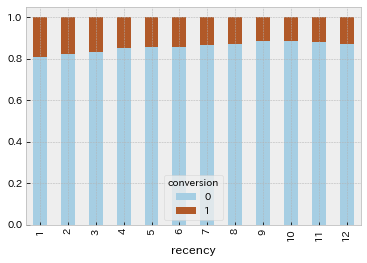

In [ ]:
# recencyとCV率
cross_recency.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# used_discountとCV率
cross_used_discount = pd.crosstab(df["used_discount"], df["conversion"], normalize="index")
cross_used_discount

conversion,0,1
used_discount,,
0,0.855850,0.144150
1,0.851075,0.148925


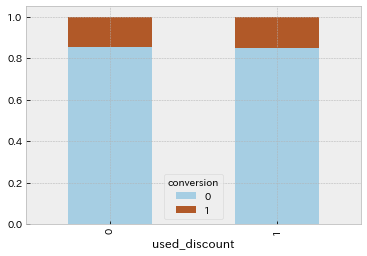

In [ ]:
# used_discountとCV率
cross_used_discount.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# used_bogoとCV率
cross_used_bogo = pd.crosstab(df["used_bogo"], df["conversion"], normalize="index")
cross_used_bogo

conversion,0,1
used_bogo,,
0,0.873551,0.126449
1,0.836564,0.163436


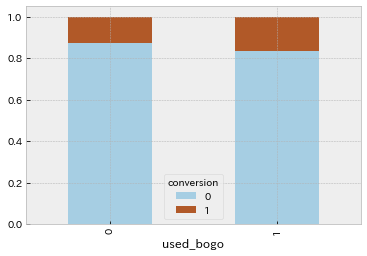

In [ ]:
# used_bogoとCV率
cross_used_bogo.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# zip_codeとCV率
cross_zip_code = pd.crosstab(df["zip_code"], df["conversion"], normalize="index")
cross_zip_code

conversion,0,1
zip_code,,
Rural,0.811879,0.188121
Surburban,0.860057,0.139943
Urban,0.860956,0.139044


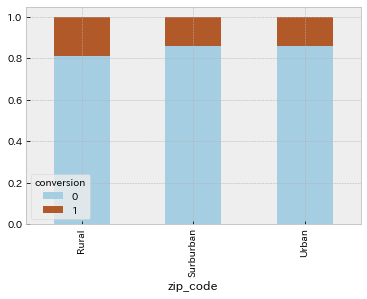

In [ ]:
# zip_codeとCV率
cross_zip_code.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# is_referralとCV率
cross_is_referral = pd.crosstab(df["is_referral"], df["conversion"], normalize="index")
cross_is_referral

conversion,0,1
is_referral,,
0,0.826940,0.173060
1,0.879262,0.120738


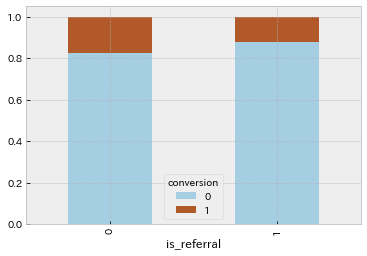

In [ ]:
# is_referralとCV率
cross_is_referral.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# channelとCV率
cross_channel = pd.crosstab(df["channel"], df["conversion"], normalize="index")
cross_channel

conversion,0,1
channel,,
Multichannel,0.828266,0.171734
Phone,0.872845,0.127155
Web,0.840593,0.159407


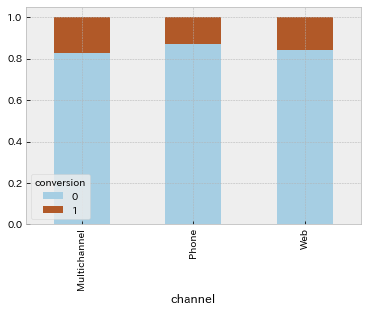

In [ ]:
# channelとCV率
cross_channel.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# offerとCV率
cross_offer = pd.crosstab(df["offer"], df["conversion"], normalize="index")
cross_offer

conversion,0,1
offer,,
Buy One Get One,0.848600,0.151400
Discount,0.817243,0.182757
No Offer,0.893833,0.106167


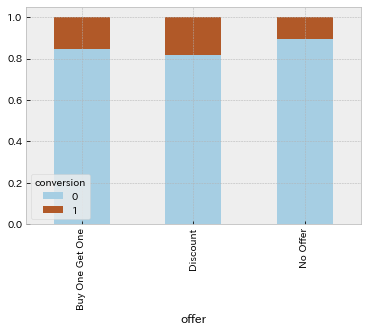

In [ ]:
# offerとCV率
cross_offer.plot.bar(stacked=True, colormap='Paired')

## その他の変数

In [ ]:
# used_discountとoffer
used_discount_offer = df.groupby(["used_discount", "offer"], as_index=False) .mean()
used_discount_offer

,used_discount,offer,recency,history,used_bogo,is_referral,conversion
0,0,Buy One Get One,5.889292,211.112605,1.000000,0.492070,0.169794
1,0,Discount,5.898516,209.915445,1.000000,0.490698,0.166388
2,0,No Offer,5.868579,209.289173,1.000000,0.489232,0.095808
3,1,Buy One Get One,5.668058,268.358405,0.180409,0.512436,0.136286
4,1,Discount,5.671863,269.668132,0.185791,0.510350,0.196098
5,1,No Offer,5.653686,266.397062,0.182320,0.512259,0.114533


In [ ]:
# used_bogoとoffer
used_bogo_offer = df.groupby(["used_bogo", "offer"], as_index=False) .mean()
used_bogo_offer

,used_bogo,offer,recency,history,used_discount,is_referral,conversion
0,0,Buy One Get One,5.870609,210.933240,1.000000,0.490439,0.110892
1,0,Discount,5.854572,211.338129,1.000000,0.491107,0.168968
2,0,No Offer,5.875389,206.624066,1.000000,0.489832,0.099813
3,1,Buy One Get One,5.683808,268.383454,0.180025,0.513727,0.184530
4,1,Discount,5.707805,268.459898,0.185633,0.510001,0.193974
5,1,No Offer,5.645869,269.180927,0.184179,0.511999,0.111416


In [ ]:
# used_bogoとoffer
used_bogo_offer = df.groupby(["used_bogo", "used_discount", "offer"], as_index=False) .mean()
used_bogo_offer

,used_bogo,used_discount,offer,recency,history,is_referral,conversion
0,0,1,Buy One Get One,5.870609,210.933240,0.490439,0.110892
1,0,1,Discount,5.854572,211.338129,0.491107,0.168968
2,0,1,No Offer,5.875389,206.624066,0.489832,0.099813
3,1,0,Buy One Get One,5.889292,211.112605,0.492070,0.169794
4,1,0,Discount,5.898516,209.915445,0.490698,0.166388
5,1,0,No Offer,5.868579,209.289173,0.489232,0.095808
6,1,1,Buy One Get One,4.747875,529.238924,0.612370,0.251653
7,1,1,Discount,4.871160,525.293150,0.594681,0.314993
8,1,1,No Offer,4.659376,534.471577,0.612843,0.180549


## ここまでの洞察
**全体のCV率=0.147**
- recency
  - 前回購入した日からの期間が短いほどCV率が高そう
- history
 - 過去の購入品の価値が高いほどCV率が高そう
- used_discount
  - 以前割引を使ったか否かはCVに関係がなさそう
- used_bogo
  - 以前BoGoを利用した人ほどCV率が高そう
- zip_code
  - 農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高そう
- is_referral
  - リファラルで流入していない人の方がCV率が高そう
- channel
  - マルチチャネル、ウェブ、電話の順にCV率が高くなりそう（マルチチャネルとは？）
- offer
  - 割引のオファー、BoGoのオファーの順に受け取った人のCV率が高そう


## 平均値・関連性の検定
※有意水準 5%


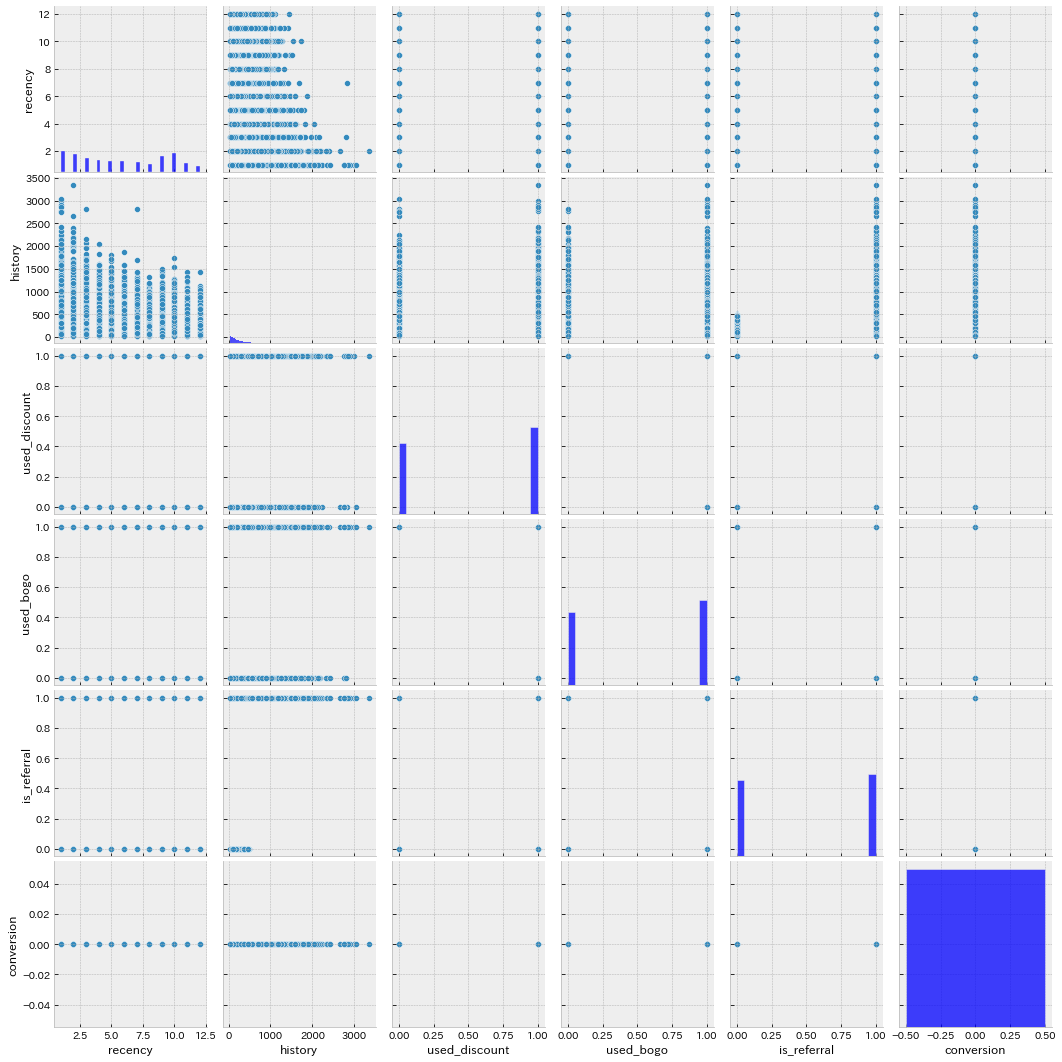

In [ ]:
df_cv0 = df.query('conversion==0')
sns.pairplot(df_cv0)

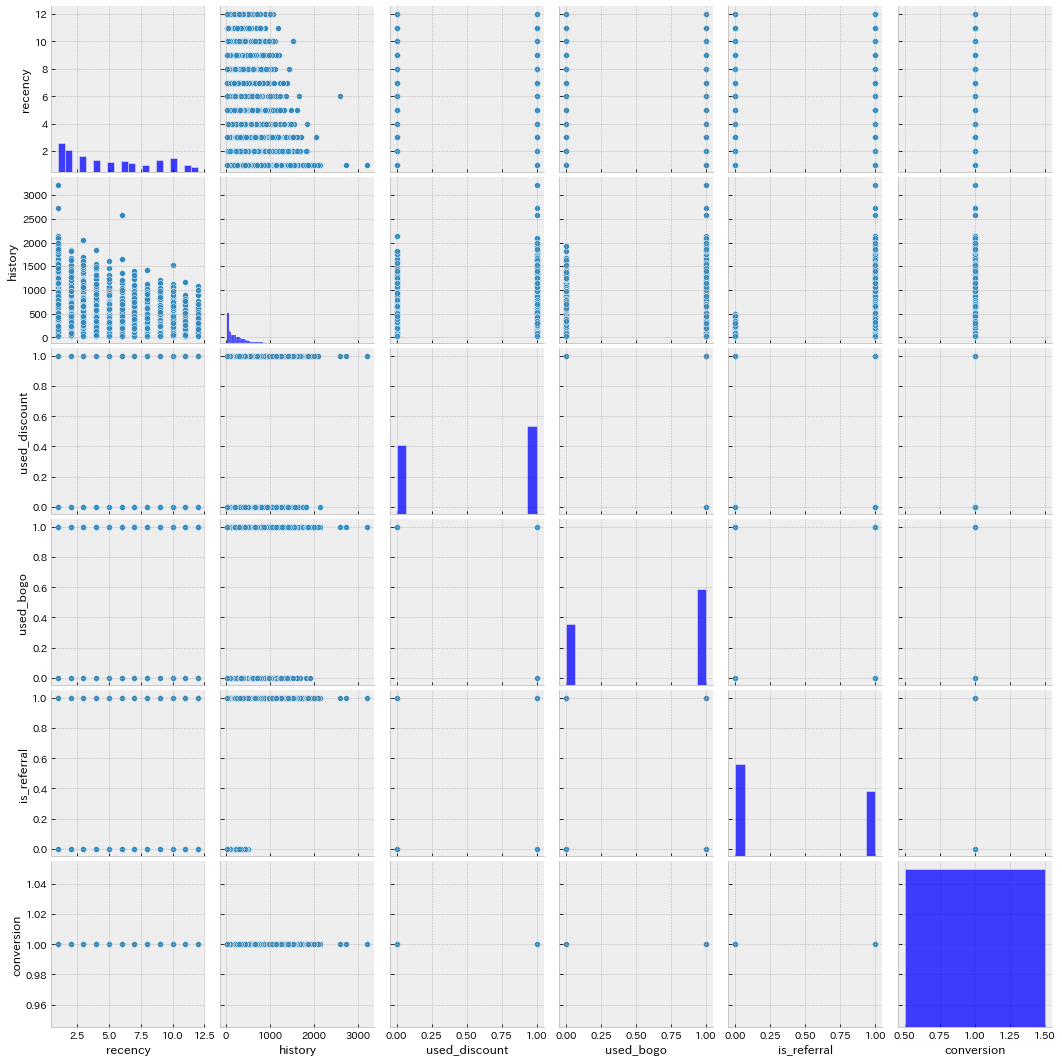

In [ ]:
df_cv1 = df.query('conversion==1')
sns.pairplot(df_cv1)

## [仮説1]前回購入した日からの期間が短いほどCV率が高そう

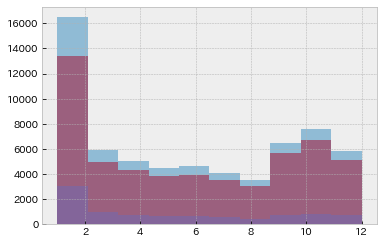

In [ ]:
plt.hist(df['recency'], alpha=0.5);
plt.hist(df_cv0['recency'], alpha=0.5);
plt.hist(df_cv1['recency'], alpha=0.7);

In [ ]:
# 購入後、2 ヶ月未満で CV した人と、 3 ヶ月以降でした人で差があるのではないか
dic1 = {1:0, 2:0,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1}

cross_recency_conv = pd.crosstab(df.query('offer!="No Offer"')['recency'].map(dic1), df.query('offer!="No Offer"')['conversion'])
cross_recency_conv

conversion,0,1
recency,,
0,8700,2287
1,26862,4845


In [ ]:
cross_recency_conv[1][0] / (cross_recency_conv[1][0] + cross_recency_conv[0][0])

0.208

In [ ]:
cross_recency_conv[1][1] / (cross_recency_conv[1][1] +cross_recency_conv[0][1])

0.153

帰無仮説：　前回購入した日からの2ヶ月以内顧客の方がCV率（CVの平均）が低い

対立仮説：　前回購入した日から2ヶ月以内の顧客の方がCV率（CVの平均）が高い


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_recency_conv, correction=False)
p

0.000

**前回購入した日から2ヶ月以内の顧客の方がCV率（CVの平均）が高い**



## [仮説2]過去の購入品の価値が高いほどCV率が高そう

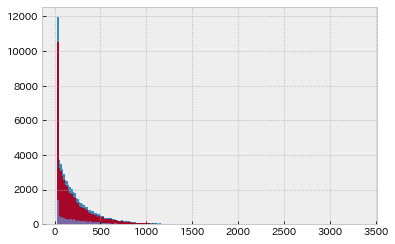

In [ ]:
# 分布を確認
plt.hist(df['history'], bins=200);
plt.hist(df_cv0['history'], bins=200);
plt.hist(df_cv1['history'], bins=200);

In [ ]:
df_cv1['history'].value_counts(ascending=True)
# 29.99 が以上に多い = 平均値が引っ張られるため削除して考える

34.00       1
68.43       1
117.59      1
709.11      1
99.09       1
         ... 
46.13       3
127.99      3
75.84       4
36.44       5
29.99     959
Name: history, Length: 7824, dtype: int64

In [ ]:
# 29.99 の値のものを削除
df_cv0_his = df_cv0[df_cv0['history']!=29.99]['history']
df_cv1_his = df_cv1[df_cv1['history']!=29.99]['history']
df_cv0_his.value_counts(ascending=True)

104.00    1
124.92    1
661.09    1
261.94    1
280.68    1
         ..
53.79     8
40.43     8
41.89     8
72.97     8
47.03     8
Name: history, Length: 30958, dtype: int64

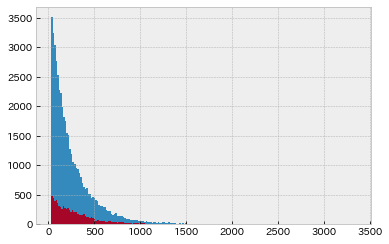

In [ ]:
plt.hist(df_cv0_his, bins=200);
plt.hist(df_cv1_his, bins=200);

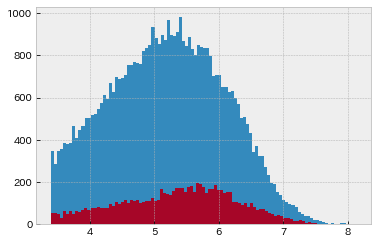

In [ ]:
# 対数変換：データにゼロや負がなければ np.log(), あるなら np.log1p を使用する
# 外れ値を弾いてからならOK
plt.hist(df_cv0_his.apply(np.log), bins=100);
plt.hist(df_cv1_his.apply(np.log), bins=100);

In [ ]:
# バートレット検定 → 棄却できない（等分散を仮定）
stats.bartlett(df_cv0_his.apply(np.log), df_cv1_his.apply(np.log))

BartlettResult(statistic=1.17020367347918, pvalue=0.2793593950504303)

帰無仮説：　過去の購入品の価値が高いほどCV率が低い

対立仮説：　過去の購入品の価値が高いほどCV率が高い


In [ ]:
# t 検定
stats.ttest_ind(df_cv0_his.apply(np.log), df_cv1_his.apply(np.log), equal_var=True)

Ttest_indResult(statistic=-16.23380408638966, pvalue=3.9702101461691662e-59)

In [ ]:
3.9702101461691662e-59

0.000

**過去の購入品の価値が高いほどCV率が高い**

## [仮説3]以前割引を使ったか否かはCVに関係がなさそう

In [ ]:
cross_used_discount_noindex = pd.crosstab(df['used_discount'], df['conversion'])
cross_used_discount_noindex

conversion,0,1
used_discount,,
0,24592,4142
1,30014,5252


帰無仮説：　used_discountとconversionは関係がない

対立仮説：　used_discountとconversionは関係がある

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_used_discount_noindex, correction=False)
p

0.090

**以前割引を使ったか否かはCVに関係があるとは言えない**

## [仮説4]以前BoGoを利用した人ほどCV率が高そう

In [ ]:
cross_used_bogo_noindex = pd.crosstab(df['used_bogo'], df['conversion'])
cross_used_bogo_noindex

conversion,0,1
used_bogo,,
0,25174,3644
1,29432,5750


帰無仮説：　used_bogoとconversionは関係がない

対立仮説：　used_bogoとconversionは関係がある

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_used_bogo_noindex, correction=False)
p

0.000

**過去のBoGoの利用とCVは関係がある**

## [仮説5]農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高そう


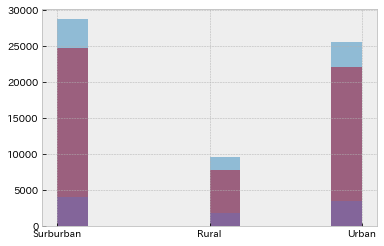

In [ ]:
plt.hist(df['zip_code'], alpha=0.5);
plt.hist(df_cv0['zip_code'], alpha=0.5);
plt.hist(df_cv1['zip_code'], alpha=0.7);

In [ ]:
# 「農村」と「都市or郊外」でのCVの違いがあるのでは
# 「農村」→1, 「都市or郊外」→0
dic2 = {'Surburban':0, 'Urban':0, 'Rural':1}

cross_zip_code_cv_2 = pd.crosstab(df['zip_code'].map(dic2), df['conversion'])
cross_zip_code_cv_2

conversion,0,1
zip_code,,
0,46842,7595
1,7764,1799


In [ ]:
cross_zip_code_cv_per = pd.crosstab(df['zip_code'].map(dic2), df['conversion'], normalize='index')
cross_zip_code_cv_per

conversion,0,1
zip_code,,
0,0.860481,0.139519
1,0.811879,0.188121


帰無仮説：　農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高くない

対立仮説：　農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高い

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_zip_code_cv_2, correction=False)
p

0.000

**農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高い**

## [仮説6]リファラルで流入していない人の方がCV率が高そう

In [ ]:
cross_is_referral_noindex = pd.crosstab(df['is_referral'], df['conversion'])
cross_is_referral_noindex

conversion,0,1
is_referral,,
0,26343,5513
1,28263,3881


帰無仮説：　リファラルで流入していない人の方がCV率が高くない

対立仮説：　リファラルで流入していない人の方がCV率が高い

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_is_referral_noindex, correction=False)
p

0.000

**リファラルで流入していない人の方がCV率が高い（リファラルはあまり意味がない？）**

## [仮説7]Webの方が電話よりCVに繋がりそう（今回マルチチャネルは省く）

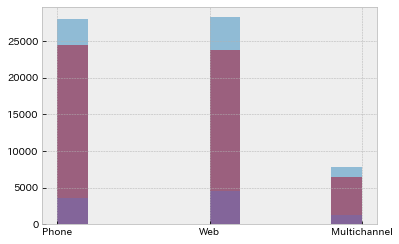

In [ ]:
plt.hist(df['channel'], alpha=0.5);
plt.hist(df_cv0['channel'], alpha=0.5);
plt.hist(df_cv1['channel'], alpha=0.7);

In [ ]:
# 電話とWebのCVの違いがあるのでは
# 電話→1, Web→0
dic3 = {'Phone':1, 'Web':0}

cross_channel_cv_2 = pd.crosstab(df.query('channel!="Multichannel"')['channel'].map(dic3), df.query('channel!="Multichannel"')['conversion'])
cross_channel_cv_2

conversion,0,1
channel,,
0,23719,4498
1,24458,3563


In [ ]:
dic3 = {'Phone':1, 'Web':0, 'Multichannel':1}

cross_channel_cv_2_per = pd.crosstab(df.query('channel!="Multichannel"')['channel'].map(dic3), df.query('channel!="Multichannel"')['conversion'], normalize='index')
cross_channel_cv_2_per

conversion,0,1
channel,,
0,0.840593,0.159407
1,0.872845,0.127155


帰無仮説： Webの方が電話よりCVに繋がるわけではない（今回マルチチャネルは省く）

対立仮説：　Webの方が電話よりCVに繋がる（今回マルチチャネルは省く）

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_channel_cv_2, correction=False)
p

0.000

**Webの方が電話よりCVに繋がる（今回マルチチャネルは省く）**

## [仮説8-1]オファーを出した方がCVに繋がる




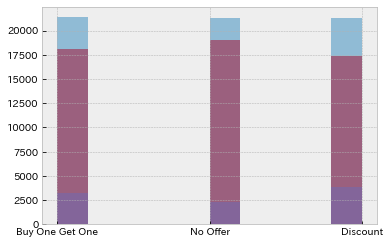

In [ ]:
plt.hist(df['offer'], alpha=0.5);
plt.hist(df_cv0['offer'], alpha=0.5);
plt.hist(df_cv1['offer'], alpha=0.7);

In [ ]:
# オファーありとなしではCVに違いがあるのでは
# 「Bogo or Discountのオファーあり」→0, 「No Offer」→1
dic4 = {'Buy One Get One':0, 'Discount':0,  'No Offer':1}

cross_offer_cv_2 = pd.crosstab(df['offer'].map(dic4), df['conversion'])
cross_offer_cv_2

conversion,0,1
offer,,
0,35562,7132
1,19044,2262


In [ ]:
cross_offer_cv_2_per = pd.crosstab(df['offer'].map(dic4), df['conversion'], normalize='index')
cross_offer_cv_2_per

conversion,0,1
offer,,
0,0.832951,0.167049
1,0.893833,0.106167



帰無仮説：　オファーを出した方がCV率が高くない

対立仮説：　オファーを出した方がCV率が高い

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_offer_cv_2, correction=False)
p

0.000

**オファーを出した方がCV率が高い**

## [仮説8-2]offerはdiscountの方がBoGoよりCV率が高い




In [ ]:
# offerの種類でCVの違いが出るのでは
# Bogo→0, Discount→1
dic5 = {'Buy One Get One':0, 'Discount':1}

cross_offer_cv_3 = pd.crosstab(df.query('offer!="No Offer"')['offer'].map(dic5), df.query('offer!="No Offer"')['conversion'])
cross_offer_cv_3

conversion,0,1
offer,,
0,18149,3238
1,17413,3894


In [ ]:
cross_offer_cv_3_per = pd.crosstab(df.query('offer!="No Offer"')['offer'].map(dic5), df.query('offer!="No Offer"')['conversion'], normalize='index')
cross_offer_cv_3_per

conversion,0,1
offer,,
0,0.848600,0.151400
1,0.817243,0.182757


帰無仮説： offerはdiscountの方がBoGoよりCVに繋がるわけではない

対立仮説：　offerはdiscountの方がBoGoよりCVに繋がる

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_offer_cv_3, correction=False)
p

0.000

**offerはdiscountの方がBoGoよりCVに繋がる**

## ここまでのまとめ
- 前回購入した日から2ヶ月以内の顧客の方がCV率（CVの平均）が高い
- 過去の購入品の価値が高いほどCV率が高い
- 以前discountを使ったか否かはCVに関係があるとは言えない
- 過去のBoGoの利用とCVは関係がある
- 農村に住んでいる人の方が、都市や郊外に住んでいる人よりもCV率が高い
- リファラルで流入していない人の方がCV率が高い（→リファラルはあまり意味がない？）
- Webの方が電話よりCVに繋がる（今回マルチチャネルは省く）
-オファーを出した方がCV率が高い
- offerはdiscountの方がBoGoよりCVに繋がる




## さらに他の変数同士の関係を調べる

In [ ]:
# discount使った顧客を抽出
df_used_discount = df[df["used_discount"] == 1]
df_used_discount.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0


In [ ]:
# discount使った顧客のofferに対するCV
cross_dis_offer_cv = pd.crosstab(df_used_discount["offer"], df_used_discount["conversion"], normalize="index")
cross_dis_offer_cv

conversion,0,1
offer,,
Buy One Get One,0.863714,0.136286
Discount,0.803902,0.196098
No Offer,0.885467,0.114533


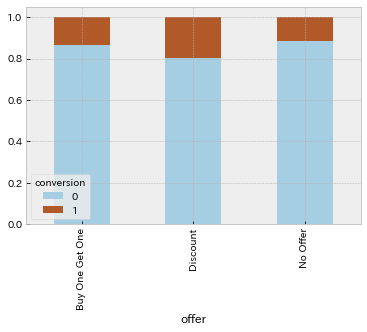

In [ ]:
cross_dis_offer_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# bogo使った顧客を抽出
df_used_bogo = df[df["used_bogo"] == 1]
df_used_bogo.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0


In [ ]:
# bogo使った顧客のofferに対するCV
cross_bogo_offer_cv = pd.crosstab(df_used_bogo["offer"], df_used_bogo["conversion"], normalize="index")
cross_bogo_offer_cv

conversion,0,1
offer,,
Buy One Get One,0.815470,0.184530
Discount,0.806026,0.193974
No Offer,0.888584,0.111416


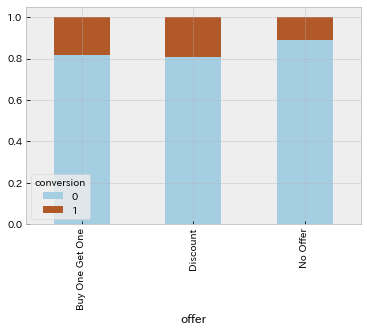

In [ ]:
cross_bogo_offer_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# 郊外に住んでいる顧客を抽出
df_zip_sur = df[df["zip_code"] == "Surburban"]
df_zip_sur.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
12,5,642.90,0,1,Surburban,1,Multichannel,Buy One Get One,0


In [ ]:
# 郊外に住んでいる顧客のchannel別のCV
cross_zip_sur_channel_cv = pd.crosstab(df_zip_sur.query('channel!="Multichannel"')["channel"], df_zip_sur.query('channel!="Multichannel"')["conversion"], normalize="index")
cross_zip_sur_channel_cv

conversion,0,1
channel,,
Phone,0.878604,0.121396
Web,0.850430,0.149570


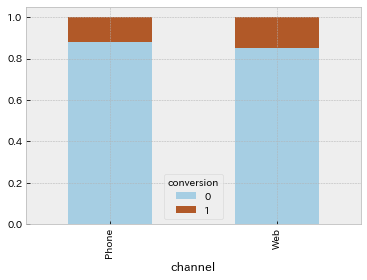

In [ ]:
cross_zip_sur_channel_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# 都市に住んでいる顧客を抽出
df_zip_urban = df[df["zip_code"] == "Urban"]
df_zip_urban.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
9,10,32.84,0,1,Urban,1,Web,Buy One Get One,0
10,7,548.91,0,1,Urban,1,Phone,Buy One Get One,1
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0


In [ ]:
# 都市に住んでいる顧客のchannel別のCV
cross_zip_urb_channel_cv = pd.crosstab(df_zip_urban.query('channel!="Multichannel"')["channel"], df_zip_urban.query('channel!="Multichannel"')["conversion"], normalize="index")
cross_zip_urb_channel_cv

conversion,0,1
channel,,
Phone,0.880849,0.119151
Web,0.846635,0.153365


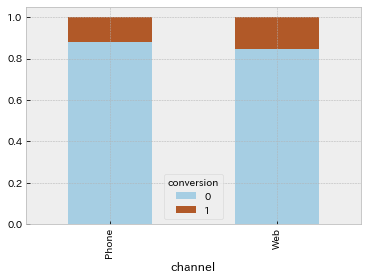

In [ ]:
cross_zip_urb_channel_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# 農村に住んでいる顧客を抽出
df_zip_rural = df[df["zip_code"] == "Rural"]
df_zip_rural.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
1,6,329.08,1,1,Rural,1,Web,No Offer,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0
14,4,241.42,0,1,Rural,1,Multichannel,No Offer,0
17,9,112.35,1,0,Rural,0,Web,Discount,0


In [ ]:
# 都市に住んでいる顧客のchannel別のCV
cross_zip_rural_channel_cv = pd.crosstab(df_zip_rural.query('channel!="Multichannel"')["channel"], df_zip_rural.query('channel!="Multichannel"')["conversion"], normalize="index")
cross_zip_rural_channel_cv

conversion,0,1
channel,,
Phone,0.834088,0.165912
Web,0.794950,0.205050


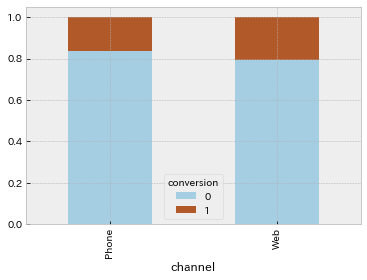

In [ ]:
cross_zip_rural_channel_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# 電話で購入した顧客を抽出
df_channel_phone = df[df["channel"] == "Phone"]
df_channel_phone.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0


In [ ]:
# 電話で購入した顧客のdiscountの使用別のCV
cross_chan_phone_dis_cv = pd.crosstab(df_channel_phone["used_discount"], df_channel_phone["conversion"], normalize="index")
cross_chan_phone_dis_cv

conversion,0,1
used_discount,,
0,0.872754,0.127246
1,0.872923,0.127077


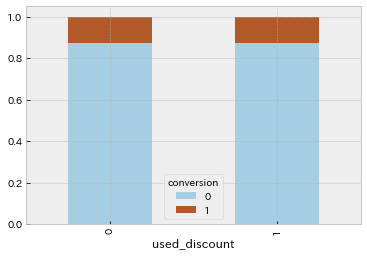

In [ ]:
cross_chan_phone_dis_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
# 電話で購入した顧客のbogoの使用別のCV
cross_chan_phone_bogo_cv = pd.crosstab(df_channel_phone["used_bogo"], df_channel_phone["conversion"], normalize="index")
cross_chan_phone_bogo_cv

conversion,0,1
used_bogo,,
0,0.892097,0.107903
1,0.856377,0.143623


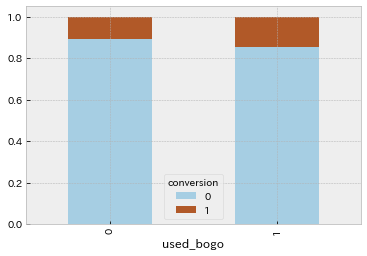

In [ ]:
cross_chan_phone_bogo_cv.plot.bar(stacked=True, colormap='Paired')

In [ ]:
#recencyとhistory
df_recency_history = df.groupby("recency").mean()
df_recency_history

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


In [ ]:
#recencyとhistory
df_recency_history_mean = df.groupby("recency").mean()
df_recency_history_mean

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


In [ ]:
df_rec_dis = df[(df["recency"] <= 2)]
df_rec_dis.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1
22,2,118.40,1,0,Surburban,0,Web,Discount,1
23,2,29.99,0,1,Urban,1,Phone,No Offer,0


In [ ]:
df_rec_dis.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000
mean,1.457093,337.514072,0.573534,0.568015,0.544242,0.186063
std,0.498171,335.413269,0.494578,0.495367,0.498054,0.389170
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,96.310000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,231.330000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,470.050000,1.000000,1.000000,1.000000,0.000000
max,2.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_rec_dis2 = df[(df["recency"] >= 3) ]
df_rec_dis2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1


In [ ]:
df_rec_dis2.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,47511.000000,47511.000000,47511.000000,47511.000000,47511.000000,47511.000000
mean,7.258382,208.966606,0.543222,0.543369,0.487677,0.133148
std,2.795711,212.344332,0.498134,0.498121,0.499853,0.339738
min,3.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,57.340000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,140.180000,1.000000,1.000000,0.000000,0.000000
75%,10.000000,284.950000,1.000000,1.000000,1.000000,0.000000
max,12.000000,2816.010000,1.000000,1.000000,1.000000,1.000000


## ここまでの洞察2
- 以前にdiscountを使った顧客はofferを受け取ったらCVする確率が高そう
- 以前にdiscountを使った顧客はdiscountのofferを受け取った方がBoGoのofferを受け取るよりCVに繋がりそう
- 以前にBoGoを使った顧客はofferを受け取ったらCVする確率が高そう
- 以前にBoGoを使った顧客はdiscountのofferでもBoGoのofferでもどちらのofferを受け取ったかはCVに関係なさそう
- 郊外に住んでいる顧客はWebで購入する方がCVに繋がりそう
- 都市に住んでいる顧客はWebで購入する方がCVに繋がりそう
- 農村に住んでいる顧客はWebで購入する方がCVに繋がりそう
- 電話で購入した顧客のused_discountの有無はCVに関係なさそう
- 電話で購入した顧客はBoGoを過去に利用した顧客の方がCVに繋がりそう


→→住んでる場所によってchannelの利用比率は変わらなそう
- 前回購入から月数が経っていないほど購入品の過去の価値も高そう
- 前回購入から2ヶ月以内の顧客の方が購入品の価値が高そう

## 平均値・関連性の検定2

## [仮説9]以前discountを使った顧客はdiscountのofferを受け取ったらCVする確率が高そう

In [ ]:
# Bogo→0, Discount→1
dic6 = {'Buy One Get One':0, 'Discount':1}

cross_offer_cv_５ = pd.crosstab(df_used_discount.query('offer!="No Offer"')['offer'].map(dic6), df_used_discount.query('offer!="No Offer"')['conversion'])
cross_offer_cv_5

conversion,0,1
offer,,
0,10140,1600
1,9437,2302


In [ ]:
cross_offer_cv_5_per = pd.crosstab(df_used_discount.query('offer!="No Offer"')['offer'].map(dic6), df_used_discount.query('offer!="No Offer"')['conversion'], normalize='index')
cross_offer_cv_5_per

conversion,0,1
offer,,
0,0.863714,0.136286
1,0.803902,0.196098


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(cross_offer_cv_5, correction=False)
p

0.000

**以前discountを使った顧客はdiscountのofferを受け取ったらCVする確率が高い**

## [仮説10]前回購入から2ヶ月以内の顧客の方が購入品の価値の平均が高そう

In [ ]:
df_rec2 = df.query('recency<=2')

In [ ]:
df_rec3 = df.query('recency>=3')

In [ ]:
#差を確認
print(df_rec2['history'].mean())
print(df_rec3['history'].mean())

337.5140718054587
208.96660647010557


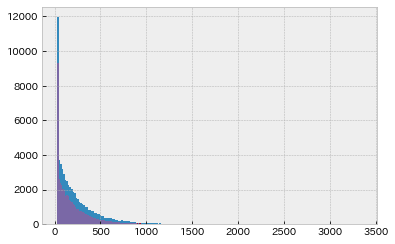

In [ ]:
# 分布を確認
plt.hist(df['history'], bins=200);
plt.hist(df_rec2['history'], bins=200);
plt.hist(df_rec3['history'], bins=200);

In [ ]:
df_rec2['history'].value_counts(ascending=True)
# 29.99 が以上に多い = 平均値が引っ張られるため削除して考える

128.00       1
536.69       1
612.52       1
131.58       1
79.48        1
          ... 
110.07       4
213.79       4
108.40       4
85.17        4
29.99     1419
Name: history, Length: 13566, dtype: int64

In [ ]:
# 29.99 の値のものを削除
df_rec2_his = df_rec2[df_rec2['history']!=29.99]['history']
df_rec3_his = df_rec3[df_rec3['history']!=29.99]['history']
df_rec2_his.value_counts(ascending=True)

128.00    1
581.26    1
394.76    1
980.39    1
398.74    1
         ..
110.07    4
145.87    4
89.59     4
232.98    4
102.48    4
Name: history, Length: 13565, dtype: int64

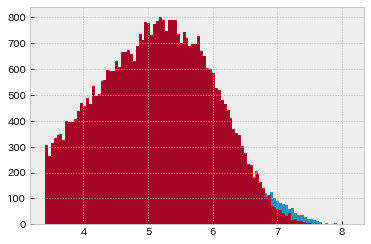

In [ ]:
plt.hist(df_rec2_his.apply(np.log), bins=100);
plt.hist(df_rec3_his.apply(np.log), bins=100);

In [ ]:
# バートレット検定
stats.bartlett(df_rec2_his.apply(np.log), df_rec3_his.apply(np.log))

BartlettResult(statistic=156.98711987810165, pvalue=5.1518641261279e-36)

In [ ]:
# t 検定
stats.ttest_ind(df_rec2_his.apply(np.log), df_rec3_his.apply(np.log), equal_var=True)

Ttest_indResult(statistic=47.07695211243253, pvalue=0.0)

**前回購入から2ヶ月以内の顧客の方が購入品の価値の平均が高い**

## ここまでのまとめ2
- 以前discountを使った顧客はdiscountのofferを受け取ったらCVする確率が高い
- 前回購入から2ヶ月以内の顧客の方が購入品の価値の平均が高い

## その他計算

In [ ]:
df_zip_mean = df.groupby("zip_code", as_index="False").mean()
df_zip_mean

,recency,history,used_discount,used_bogo,is_referral,conversion
zip_code,,,,,,
Rural,5.730210,242.853935,0.552023,0.547527,0.496601,0.188121
Surburban,5.803100,240.488905,0.549034,0.550111,0.503371,0.139943
Urban,5.732084,243.589924,0.552901,0.550095,0.503098,0.139044


In [ ]:
#recencyとhistory
df_recency_history_sum = df.groupby("recency").sum()
df_recency_history_sum

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,3221332.04,5125,5176,4961,1728
2,2343937.49,4332,4190,4013,1340
3,1620423.69,3291,3312,3062,982
4,1275904.43,2767,2842,2582,756
5,1051521.08,2478,2501,2210,642
6,1005673.23,2572,2478,2206,648
7,846419.81,2259,2168,1961,546
8,681259.61,1928,1852,1690,447
9,1197218.13,3442,3456,3079,734


In [ ]:
#recencyとhistory
df_recency_history_mean = df.groupby("recency").mean()
df_recency_history_mean

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


In [ ]:
df_rec_dis = df[(df["recency"] == 1) | (df["recency"] == 2) ]
df_rec_dis.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1
22,2,118.40,1,0,Surburban,0,Web,Discount,1
23,2,29.99,0,1,Urban,1,Phone,No Offer,0


In [ ]:
df_rec_dis.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000,16489.000000
mean,1.457093,337.514072,0.573534,0.568015,0.544242,0.186063
std,0.498171,335.413269,0.494578,0.495367,0.498054,0.389170
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,96.310000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,231.330000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,470.050000,1.000000,1.000000,1.000000,0.000000
max,2.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_rec_dis2 = df[(df["recency"] >= 3) ]
df_rec_dis2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1


In [ ]:
df_rec_dis2.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,47511.000000,47511.000000,47511.000000,47511.000000,47511.000000,47511.000000
mean,7.258382,208.966606,0.543222,0.543369,0.487677,0.133148
std,2.795711,212.344332,0.498134,0.498121,0.499853,0.339738
min,3.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,57.340000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,140.180000,1.000000,1.000000,0.000000,0.000000
75%,10.000000,284.950000,1.000000,1.000000,1.000000,0.000000
max,12.000000,2816.010000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_rec_num = df["recency"].value_counts()
df_rec_num

1     8952
10    7565
2     7537
9     6441
3     5904
4     5077
6     4605
5     4510
7     4078
11    3504
8     3495
12    2332
Name: recency, dtype: int64

In [ ]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# recency=1 or 2 かつ used_discount =1
# 電話で購入した顧客を抽出
df_rec_dis = df[(df["recency"] == 1) | (df["recency"] == 2) ]
df_rec_dis.head()


,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
11,1,211.45,0,1,Urban,1,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1
22,2,118.40,1,0,Surburban,0,Web,Discount,1
23,2,29.99,0,1,Urban,1,Phone,No Offer,0


In [ ]:
df_rec_dis_count = df_rec_dis["used_bogo"].value_counts()
df_rec_dis_count

1    9366
0    7123
Name: used_bogo, dtype: int64

In [ ]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [ ]:
(9366/64000)*100

14.634

In [ ]:
df_test = df.drop('recency', axis=1)
df_test['recency'] = df['recency'].map(dic1)
df_test.head()

,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,recency
0,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,1
1,329.08,1,1,Rural,1,Web,No Offer,0,1
2,180.65,0,1,Surburban,1,Web,Buy One Get One,0,1
3,675.83,1,0,Rural,1,Web,Discount,0,1
4,45.34,1,0,Urban,0,Web,Buy One Get One,0,0


In [ ]:
len(df_test.query('recency==0 & channel=="Web" & offer=="Discount" & conversion==1')) / len(df)

0.009

In [ ]:
len(df)*0.009

576.000

In [ ]:
df_cv1['history'].median()*len(df)*0.009


116616.960

In [ ]:
116616.960*113

13177716.480

In [ ]:
import plotly.graph_objects as go

In [ ]:
dep = pd.DataFrame({
    "label":["該当する顧客", "その他"],
    "value":[576, 63424]
})

fig = go.Figure(data=[go.Pie(labels=dep["label"],
                             values=dep["value"],
                             hole=0.5)])


fig.update_layout(annotations=[{
    "text":"全顧客データ",
    "x":0.5,
    "y":0.5,
    "font_size":20,
    "showarrow":False
    }])
fig.show()